In [583]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 2: German Credit Dataset
**Given a CSV data file as represented by the sample file GermanCredit.csv  Download GermanCredit.csv (1000 records), load it into a Pandas DataFrame, and perform the following tasks on it.**

In [590]:
df = pd.read_csv("GermanCredit.csv")
df.head()

checking_status  duration                    credit_history  \
0            '<0'         6  'critical/other existing credit'   
1      '0<=X<200'        48                   'existing paid'   
2   'no checking'        12  'critical/other existing credit'   
3            '<0'        42                   'existing paid'   
4            '<0'        24              'delayed previously'   

               purpose  credit_amount      savings_status employment  \
0             radio/tv           1169  'no known savings'      '>=7'   
1             radio/tv           5951              '<100'   '1<=X<4'   
2            education           2096              '<100'   '4<=X<7'   
3  furniture/equipment           7882              '<100'   '4<=X<7'   
4            'new car'           4870              '<100'   '1<=X<4'   

   installment_commitment       personal_status other_parties  ...  \
0                       4         'male single'          none  ...   
1                       2  'female div/dep/mar'          none  ...   
2                       2         'male single'          none  ...   
3                       2         'male single'     guarantor  ...   
4                       3         'male single'          none  ...   

    property_magnitude age  other_payment_plans     housing existing_credits  \
0        'real estate'  67                 none         own                2   
1        'real estate'  22                 none         own                1   
2        'real estate'  49                 none         own                1   
3     'life insurance'  45                 none  'for free'                1   
4  'no known property'  53                 none  'for free'                2   

                    job num_dependents  own_telephone foreign_worker class  
0               skilled              1            yes            yes  good  
1               skilled              1           none            yes   bad  
2  'unskilled resident'              2           none            yes  good  
3               skilled              2           none            yes  good  
4               skilled              2           none            yes   bad  

[5 rows x 21 columns]

## Preprocessing (31 pts)

**1.[8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)**

In [602]:
df.replace("none", np.nan, inplace=True)

18

In [603]:
def drop_cols(n):
    res = df.isnull().sum().sort_values(ascending=False)
    count = 1
    for col in res.index:
        if count > n:
            break
        else:
            count += 1
            
        if res[col] > 0:
            df.drop(col, axis=1, inplace=True)
drop_cols(3)

In [604]:
df.head()

18

**2.[4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.**

In [605]:
df.replace('\'','', regex=True, inplace=True)

**3.The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.**

In [30]:
def replace_values(col, current_cols, new_cols):
    df[col].replace(to_replace=current_cols
                    , value=new_cols, inplace=True)                 

In [606]:
replace_values("checking_status", ["no checking", "<0", "0<=X<200", ">=200"], ["No Checking", "Low", "Medium", "High"])
df.head()

checking_status  duration                  credit_history  \
0             Low         6  critical/other existing credit   
1          Medium        48                   existing paid   
2     No Checking        12  critical/other existing credit   
3             Low        42                   existing paid   
4             Low        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status  residence_since  \
0                       4         male single                4   
1                       2  female div/dep/mar                2   
2                       2         male single                3   
3                       2         male single                4   
4                       3         male single                4   

  property_magnitude  age   housing  existing_credits                 job  \
0        real estate   67       own                 2             skilled   
1        real estate   22       own                 1             skilled   
2        real estate   49       own                 1  unskilled resident   
3     life insurance   45  for free                 1             skilled   
4  no known property   53  for free                 2             skilled   

   num_dependents foreign_worker class  
0               1            yes  good  
1               1            yes   bad  
2               2            yes  good  
3               2            yes  good  
4               2            yes   bad

**4.[5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').**

In [611]:
current_cols= [
    "no known savings", 
    "<100", 
    "100<=X<500",
    "500<=X<1000",
    ">=1000"]
new_cols = [
    "No Savings",
    "Low",
    "Medium",
    "High",
    "High"]
col = "savings_status"
replace_values(col, current_cols, new_cols)

In [612]:
df.head()

checking_status  duration                  credit_history  \
0             Low         6  critical/other existing credit   
1          Medium        48                   existing paid   
2     No Checking        12  critical/other existing credit   
3             Low        42                   existing paid   
4             Low        24              delayed previously   

               purpose  credit_amount savings_status employment  \
0             radio/tv           1169     No Savings        >=7   
1             radio/tv           5951            Low     1<=X<4   
2            education           2096            Low     4<=X<7   
3  furniture/equipment           7882            Low     4<=X<7   
4              new car           4870            Low     1<=X<4   

   installment_commitment     personal_status  residence_since  \
0                       4         male single                4   
1                       2  female div/dep/mar                2   
2                       2         male single                3   
3                       2         male single                4   
4                       3         male single                4   

  property_magnitude  age   housing  existing_credits                 job  \
0        real estate   67       own                 2             skilled   
1        real estate   22       own                 1             skilled   
2        real estate   49       own                 1  unskilled resident   
3     life insurance   45  for free                 1             skilled   
4  no known property   53  for free                 2             skilled   

   num_dependents foreign_worker class  
0               1            yes  good  
1               1            yes   bad  
2               2            yes  good  
3               2            yes  good  
4               2            yes   bad

**5.[4 pts] Change class column values from 'good' to '1' and 'bad' to '0'.**

In [614]:
current_cols= [
    "good", 
    "bad", 
    ]
new_cols = [
    "1",
    "0",
    ]
col = "class"
replace_values(col, current_cols, new_cols)
df.head()

checking_status  duration                  credit_history  \
0             Low         6  critical/other existing credit   
1          Medium        48                   existing paid   
2     No Checking        12  critical/other existing credit   
3             Low        42                   existing paid   
4             Low        24              delayed previously   

               purpose  credit_amount savings_status employment  \
0             radio/tv           1169     No Savings        >=7   
1             radio/tv           5951            Low     1<=X<4   
2            education           2096            Low     4<=X<7   
3  furniture/equipment           7882            Low     4<=X<7   
4              new car           4870            Low     1<=X<4   

   installment_commitment     personal_status  residence_since  \
0                       4         male single                4   
1                       2  female div/dep/mar                2   
2                       2         male single                3   
3                       2         male single                4   
4                       3         male single                4   

  property_magnitude  age   housing  existing_credits                 job  \
0        real estate   67       own                 2             skilled   
1        real estate   22       own                 1             skilled   
2        real estate   49       own                 1  unskilled resident   
3     life insurance   45  for free                 1             skilled   
4  no known property   53  for free                 2             skilled   

   num_dependents foreign_worker class  
0               1            yes     1  
1               1            yes     0  
2               2            yes     1  
3               2            yes     1  
4               2            yes     0

**6.[5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.**

In [660]:
df["employment"].unique()
current_cols= [
    "unemployed", 
    "<1", 
    "1<=X<4",   
    "4<=X<7",
    ">=7"]
new_cols = [
    "Unemployed",
    "Amateur",
    "Professional",
    "Experienced",
    "Expert"]
col = "employment"
replace_values(col, current_cols, new_cols)

In [661]:
df.head()

checking_status  duration                  credit_history  \
0             Low         6  critical/other existing credit   
1          Medium        48                   existing paid   
2     No Checking        12  critical/other existing credit   
3             Low        42                   existing paid   
4             Low        24              delayed previously   

               purpose  credit_amount savings_status    employment  \
0             radio/tv           1169     No Savings        Expert   
1             radio/tv           5951            Low  Professional   
2            education           2096            Low   Experienced   
3  furniture/equipment           7882            Low   Experienced   
4              new car           4870            Low  Professional   

   installment_commitment     personal_status  residence_since  \
0                       4         male single                4   
1                       2  female div/dep/mar                2   
2                       2         male single                3   
3                       2         male single                4   
4                       3         male single                4   

  property_magnitude  age   housing  existing_credits                 job  \
0        real estate   67       own                 2             skilled   
1        real estate   22       own                 1             skilled   
2        real estate   49       own                 1  unskilled resident   
3     life insurance   45  for free                 1             skilled   
4  no known property   53  for free                 2             skilled   

   num_dependents foreign_worker class  
0               1            yes     1  
1               1            yes     0  
2               2            yes     1  
3               2            yes     1  
4               2            yes     0

In [619]:
# df.to_csv("TransformedGermanCredit.csv")

---

## Analysis (17 pts)

**1a. [3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).**

In [620]:
pd.crosstab(df['foreign_worker'],df['class'],colnames=['class:{0=bad,1=good}'])

class:{0=bad,1=good}    0    1
foreign_worker                
no                      4   33
yes                   296  667

**1b. [2 pts] Similarly, get the count of each category of employment for each category of saving_status.**

In [621]:
pd.crosstab(df['employment'],df['savings_status'])

savings_status  High  Low  Medium  No Savings
employment                                   
Amateur           12  120      17          23
Experienced       18  100      24          32
Expert            34  133      22          64
Professional      44  210      33          52
Unemployed         3   40       7          12

**2.Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.**

In [624]:
credit_df = df[(df['personal_status'] == 'male single') & (df['employment'] == 'Experienced')]
print("Avg credit_amount of single males that have 4<=X<7 (Experienced) years of employment: ",credit_df['credit_amount'].mean())

Avg credit_amount of single males that have 4<=X<7 (Experienced) years of employment:  4142.592592592592


**3.Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.**

In [627]:
duration_df = df.groupby('job')['duration']
print("The following are the avg credit duration for each job type: ")
duration_df.mean()

The following are the avg credit duration for each job type: 


job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

**4. For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:**

In [628]:
education_checking_df = df[(df['purpose'] == 'education')]
checking_common = education_checking_df['checking_status'].mode()
savings_common = education_checking_df['savings_status'].mode()
print('Most common checking status: ', checking_common[0])
print('Most common savings status: ', savings_common[0])

Most common checking status:  No Checking
Most common savings status:  Low


----

## Visualization (24 pts)

In [629]:
df.head(20)

checking_status  duration                  credit_history  \
0              Low         6  critical/other existing credit   
1           Medium        48                   existing paid   
2      No Checking        12  critical/other existing credit   
3              Low        42                   existing paid   
4              Low        24              delayed previously   
5      No Checking        36                   existing paid   
6      No Checking        24                   existing paid   
7           Medium        36                   existing paid   
8      No Checking        12                   existing paid   
9           Medium        30  critical/other existing credit   
10          Medium        12                   existing paid   
11             Low        48                   existing paid   
12          Medium        12                   existing paid   
13             Low        24  critical/other existing credit   
14             Low        15                   existing paid   
15             Low        24                   existing paid   
16     No Checking        24  critical/other existing credit   
17             Low        30             no credits/all paid   
18          Medium        24                   existing paid   
19     No Checking        24                   existing paid   

                purpose  credit_amount savings_status    employment  \
0              radio/tv           1169     No Savings        Expert   
1              radio/tv           5951            Low  Professional   
2             education           2096            Low   Experienced   
3   furniture/equipment           7882            Low   Experienced   
4               new car           4870            Low  Professional   
5             education           9055     No Savings  Professional   
6   furniture/equipment           2835           High        Expert   
7              used car           6948            Low  Professional   
8              radio/tv           3059           High   Experienced   
9               new car           5234            Low    Unemployed   
10              new car           1295            Low       Amateur   
11             business           4308            Low       Amateur   
12             radio/tv           1567            Low  Professional   
13              new car           1199            Low        Expert   
14              new car           1403            Low  Professional   
15             radio/tv           1282         Medium  Professional   
16             radio/tv           2424     No Savings        Expert   
17             business           8072     No Savings       Amateur   
18             used car          12579            Low        Expert   
19             radio/tv           3430           High        Expert   

    installment_commitment     personal_status  residence_since  \
0                        4         male single                4   
1                        2  female div/dep/mar                2   
2                        2         male single                3   
3                        2         male single                4   
4                        3         male single                4   
5                        2         male single                4   
6                        3         male single                4   
7                        2         male single                2   
8                        2        male div/sep                4   
9                        4        male mar/wid                2   
10                       3  female div/dep/mar                1   
11                       3  female div/dep/mar                4   
12                       1  female div/dep/mar                1   
13                       4         male single                4   
14                       2  female div/dep/mar                4   
15                       4  female div/dep/mar                2   
16                       4 

**1.[9 pts] Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.**

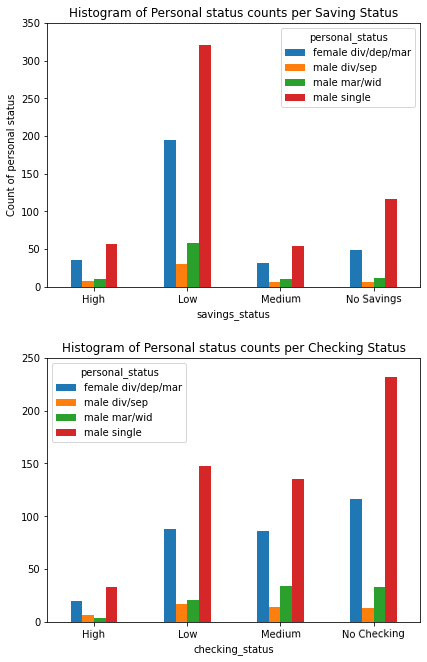

In [651]:
fig, axis = plt.subplots(2,1,figsize=(7,10))
fig.tight_layout(pad=5.0)

new = pd.crosstab(df['savings_status'],df['personal_status'])
new.plot.bar(rot=1,ax = axis[0])
axis[0].set_ylim((0,350))
axis[0].set_title("Histogram of Personal status counts per Saving Status")
axis[0].set_ylabel("Count of personal status")


new1 = pd.crosstab(df['checking_status'],df['personal_status'])
new1.plot.bar(rot=1,ax = axis[1])
axis[1].set_ylim((0,250))
axis[1].set_title("Histogram of Personal status counts per Checking Status")
axis[0].set_ylabel("Count of personal status")

plt.show()

**2.[9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).**

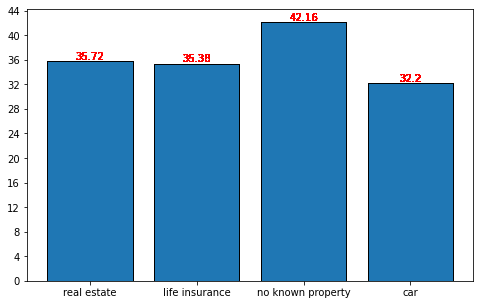

In [657]:
high_credit = df[(df['credit_amount'] > 4000)]
avg_age = high_credit.groupby('property_magnitude')['age'].transform('mean')
avg_df = avg_age.reset_index()

limit = avg_df['age'].max() + 3
plt.figure(figsize =(8,5))
bars = plt.bar(high_credit['property_magnitude'],avg_df['age'],edgecolor = 'black')
plt.yticks(range(0,int(limit),4))

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() /2
    plt.text(label_x_pos, height, s=f'{round(height,2)}',ha='center', va='bottom',c = 'red')
plt.show()

**3.[6 pts] For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts: Personal status, Credit history, Job**

In [659]:
savings_df = df[(df['savings_status'] == 'High') & (df['age'] > 40)]

fig = plt.figure(figsize=(20,15),dpi=1600)

ax1 = plt.subplot2grid((2,2),(0,0))
ax1.set_aspect('equal')
# ax1.yaxis.set_label_coords(-0.15, 0.5)
exp_df = savings_df.explode('personal_status')
exp = exp_df['personal_status'].value_counts()
exp.plot.pie(figsize=(7, 7),label = '')
plt.title('Personal Status')

ax1 = plt.subplot2grid((2,2),(1,0))
ax1.set_aspect('equal')
exp_df = savings_df.explode('credit_history')
exp = exp_df['credit_history'].value_counts()
exp.plot.pie(figsize=(7, 7),label = '')
plt.title('Credit History')


ax1 = plt.subplot2grid((2,2),(1,1))
ax1.set_aspect('equal')
exp_df = savings_df.explode('job')
exp = exp_df['job'].value_counts()
exp.plot.pie(figsize=(7, 7),label = '')
plt.title('Job')


plt.subplots_adjust(wspace=0.5)
